In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
import tensorflow as tf
from tensorflow import keras

from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn import model_selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [3]:
os.getcwd()

'C:\\Users\\robtu'

In [2]:
os.chdir(r"C:\Users\robtu\Kaggle Competitions")

In [3]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [4]:
df = pd.concat([train_df.drop(columns=['target']), test_df], ignore_index = True)
y_train = train_df['target']
test_ids = test_df['id']

# Data Exploration

In [2]:
#train_df.info()

In [29]:
df.shape

(500000, 31)

In [3]:
#df.info()

In [4]:
#test_df.info()

  # Feature Engineering 

In [28]:
df_dummies = pd.get_dummies(df).drop(columns='id')
df_dummies.head()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,cat16_C,cat16_D,cat17_A,cat17_B,cat17_C,cat17_D,cat18_A,cat18_B,cat18_C,cat18_D
0,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,...,0,1,0,0,0,1,0,1,0,0
1,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,...,0,0,0,0,0,1,0,1,0,0
2,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,...,0,1,0,0,0,1,0,1,0,0
3,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,...,0,1,0,0,0,1,0,1,0,0
4,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,...,0,0,0,0,0,1,0,1,0,0


In [29]:
X_train = df_dummies.iloc[0:300000,0:642]

X_test = df_dummies.iloc[300000:500000,0:642]

In [30]:
selector = SelectKBest(f_classif, k=10)
selected_features = selector.fit_transform(X_train, y_train)

scores = selector.scores_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [346 348 352 381 410 528 544 552] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


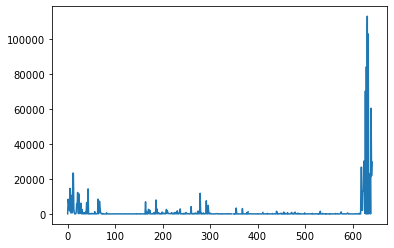

In [8]:
plt.plot(scores)
plt.show()

In [9]:
f_score_indexes = (-selector.scores_).argsort()[:50]
f_score_indexes

array([631, 633, 629, 627, 639, 625, 624, 641, 618, 619,  11,  12, 637,
       640, 636,   5,  43, 622, 623,  21, 279,  24,   6,   8,  64,   1,
       186, 292,  67, 164,   3,  40,  28,   2,  19,  20, 635, 296,  68,
       260, 355,  42, 368, 188, 237,  13,  30, 170, 208, 171], dtype=int64)

In [13]:
df_dummies.head()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,cat16_C,cat16_D,cat17_A,cat17_B,cat17_C,cat17_D,cat18_A,cat18_B,cat18_C,cat18_D
0,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,...,0,1,0,0,0,1,0,1,0,0
1,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,...,0,0,0,0,0,1,0,1,0,0
2,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,...,0,1,0,0,0,1,0,1,0,0
3,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,...,0,1,0,0,0,1,0,1,0,0
4,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,...,0,0,0,0,0,1,0,1,0,0


In [31]:
cols = df_dummies.columns

for j in range(642):
    if scores[j] < 3:
        df_dummies = df_dummies.drop(cols[j], axis=1)
            

In [32]:
df_dummies.shape

(500000, 502)

In [33]:
X_train = df_dummies.iloc[0:300000,0:502]

X_test = df_dummies.iloc[300000:500000,0:502]

In [5]:
#X_train.info()

In [34]:
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_train, y_train, test_size=0.4)

In [35]:
X_train_df.shape

(180000, 502)

  # Model Selection

In [98]:
MLA = [

ensemble.AdaBoostClassifier(),
ensemble.BaggingClassifier(),
ensemble.ExtraTreesClassifier(),
ensemble.GradientBoostingClassifier(),
ensemble.RandomForestClassifier(),

linear_model.LogisticRegressionCV(),
linear_model.PassiveAggressiveClassifier(),
linear_model.RidgeClassifierCV(),
linear_model.SGDClassifier(),
linear_model.Perceptron(),

naive_bayes.BernoulliNB(),
naive_bayes.GaussianNB(),

neighbors.KNeighborsClassifier(),

svm.SVC(probability=True),
svm.NuSVC(probability=True),
svm.LinearSVC(),

tree.DecisionTreeClassifier(),
tree.ExtraTreeClassifier(),

discriminant_analysis.LinearDiscriminantAnalysis(),
discriminant_analysis.QuadraticDiscriminantAnalysis(),

#XGBClassifier() 

]

In [48]:
model = Adamodel.fit(X_train,y_train)

In [56]:
formod = forest.fit(X_train, y_train)

In [23]:
logmod = log.fit(X_train, y_train)

In [39]:
nbmod = nb.fit(X_train, y_train)

# Model Testing

In [99]:
def MLA_test(X_initial, y_initial, f, t, verbose=0):
    X = X_initial[f:t]    
    y = y_initial[f:t]    
    
    #split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
    #note: this is an alternative to train_test_split
    cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%
    
    #create table to compare MLA metrics
    MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
    MLA_compare = pd.DataFrame(columns = MLA_columns)

    #index through MLA and save performance to table
    row_index = 0
    for alg in MLA:
        #set name and parameters
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
        #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
        cv_results = model_selection.cross_validate(alg, X, y, cv  = cv_split, n_jobs=-1, verbose=0, return_train_score=True)

        training_score = cv_results['train_score'].mean()
        test_score = cv_results['test_score'].mean()
        if verbose == 1:
            print('{}/{}'.format(row_index+1, len(MLA)), MLA_name, " - ", training_score, test_score)

        MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
        MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = training_score
        MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = test_score
        #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
        MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    
        #save MLA predictions - see section 6 for usage
        #alg.fit(data1[data1_x_bin], df[Target])
        #MLA_predict[MLA_name] = alg.predict(df[data1_x_bin])

        row_index+=1
    
    #print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
    MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
    
    
    return MLA_compare

In [1]:
#MLA_compare = MLA_test(X_train, y_train, 0, 10000, verbose=1)
#MLA_compare

# TensorFlow Model

In [36]:
df_dummies.shape

(500000, 502)

In [37]:
y_train.shape

(300000,)

In [38]:
f = 0
t = 180000
X = X_train_df[f:t]
y = y_train_df[f:t]

In [39]:
X_train_df.shape

(180000, 502)

In [77]:
model = keras.Sequential([
    
    keras.layers.Dense(60, activation='relu', input_shape= (502,)),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='relu') 
])


model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history = model.fit(X, y, epochs=2, validation_split=0.3, shuffle=True)

#best model: layers: 50-25-10-1  502 features 'adam' 'mse' 2 epochs


Epoch 1/2
3938/3938 [==============================] - 17s 4ms/step - loss: 0.1257 - accuracy: 0.8326 - val_loss: 0.1125 - val_accuracy: 0.8455
Epoch 2/2
3938/3938 [==============================] - 15s 4ms/step - loss: 0.1116 - accuracy: 0.8466 - val_loss: 0.1109 - val_accuracy: 0.8478


In [78]:
test_loss, test_acc = model.evaluate(X_test_df, y_test_df, verbose=1) 

print('Test accuracy:', test_acc)

3750/3750 [==============================] - 12s 3ms/step - loss: 0.1113 - accuracy: 0.8470
Test accuracy: 0.8470083475112915


In [62]:
y_pred = model.predict(X_test)

In [63]:
y_pred.shape

(200000, 1)

In [65]:
df_results = pd.DataFrame({'id':test_ids, 'target':y_pred.reshape(y_pred.shape[0])})
df_results.head()

,id,target
0,5,0.139930
1,6,0.434369
2,8,0.050159
3,9,0.119325
4,11,0.116143


In [66]:
compression_opts = dict(method='zip',
                        archive_name='results19.csv')

df_results.to_csv('results19.zip', index=False,
          compression=compression_opts) 